<a href="https://colab.research.google.com/github/dduyeon/ITB_Mining/blob/main/1912264_%EB%82%A8%EC%88%98%EC%97%B0_ITB%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

In [6]:
health = pd.read_csv('/content/drive/MyDrive/ITB/health_data.csv', encoding = 'utf-8')

# 데이터 살펴보기

In [7]:
health.head()

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


In [8]:
health.shape

(10000, 31)

In [9]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 도출하고자 하는 인사이트

## 1.음주여부와 간 기능 관련 수치들(혈청크레아티닌, AST, ALT, 감마지피티)의 상관관계 분석
## 2. 공복 혈당으로 당뇨병 혹은 저혈당 판정 후 성별, 연령별 분포 분석
## 3. 수축기 혈압과 이완기 혈압을 통해 고혈압 판정 후 LDL콜레스테롤과의 상관관계 분석

# 인사이트 1을 위한 데이터 전처리

In [10]:
health_1 = health[['혈청크레아티닌','(혈청지오티)AST','(혈청지오티)ALT','감마지티피','음주여부']]

In [12]:
health_1.head()

,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,음주여부
0,1.1,21.0,27.0,21.0,No
1,0.5,18.0,15.0,15.0,No
2,0.7,27.0,25.0,7.0,No
3,1.2,65.0,97.0,72.0,No
4,0.7,18.0,17.0,14.0,No


In [11]:
health_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   혈청크레아티닌     9912 non-null   float64
 1   (혈청지오티)AST  9912 non-null   float64
 2   (혈청지오티)ALT  9912 non-null   float64
 3   감마지티피       9912 non-null   float64
 4   음주여부        9999 non-null   object 
dtypes: float64(4), object(1)
memory usage: 390.8+ KB


In [13]:
# 결측치 있는 행 제거
health_1 = health_1.dropna(axis = 0)

In [14]:
health_1

,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,음주여부
0,1.1,21.0,27.0,21.0,No
1,0.5,18.0,15.0,15.0,No
2,0.7,27.0,25.0,7.0,No
3,1.2,65.0,97.0,72.0,No
4,0.7,18.0,17.0,14.0,No
...,...,...,...,...,...
9995,0.7,20.0,21.0,20.0,Yes
9996,0.7,24.0,22.0,21.0,Yes
9997,1.0,22.0,27.0,35.0,No
9998,1.0,26.0,24.0,21.0,No


In [19]:
from pandas.core.base import value_counts
# 음주 비율 확인
health_1['음주여부'].value_counts()

Yes    5804
No     4107
Name: 음주여부, dtype: int64

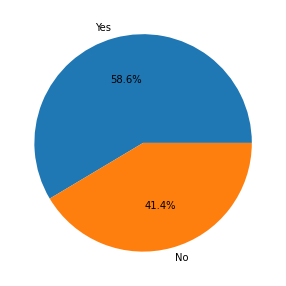

In [20]:
x = [5804/9911*100, 4107/9911*100]
y = ['Yes','No']

plt.figure(figsize=(5,5))
plt.pie(x, labels= y, autopct='%.1f%%')  #autopct: format for values
plt.show()

In [15]:
health_1.groupby('음주여부').mean()

,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피
음주여부,,,,
No,0.823570,26.731678,24.851960,27.305576
Yes,0.866139,28.199173,28.163853,45.740351


혈청크레아티닌, AST,ALT,감마지티피 모두 간기능 이상이 있을 경우 수치가 증가한다.

### 인사이트_1: 음주여부를 기준으로 수치의 평균을 비교해보았을 때 음주를 하는 사람들의 수치가 높음을 알 수 있다.

# 인사이트2를 위한 데이터 전처리

In [34]:
health_2 = health[['성별코드','연령대코드(5세단위)','식전혈당(공복혈당)']]
health_2 = health_2.dropna(axis = 0)

In [35]:
health_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9912 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   성별코드         9912 non-null   object 
 1   연령대코드(5세단위)  9912 non-null   int64  
 2   식전혈당(공복혈당)   9912 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 309.8+ KB


In [41]:
health_2 = health_2.astype({'식전혈당(공복혈당)':'int'})

In [42]:
health_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9912 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   성별코드         9912 non-null   object
 1   연령대코드(5세단위)  9912 non-null   int64 
 2   식전혈당(공복혈당)   9912 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 309.8+ KB


In [61]:
health_2['연령대코드(5세단위)'].max()

18

In [62]:
# 식전혈당(공복혈당)이 126이상이면 당뇨병으로 봄, 데이터에서 당뇨병 위험 환자만 추출함.

health_2bs = health_2[health_2['식전혈당(공복혈당)']>=126]

In [54]:
health_2bs

,성별코드,연령대코드(5세단위),식전혈당(공복혈당)
3,M,13,146
6,M,9,250
26,M,11,136
45,M,10,128
60,F,11,144
...,...,...,...
9931,M,15,145
9932,F,14,167
9952,F,14,142
9958,M,10,247


In [63]:
# 연령대코드의 고유값을 살펴보니 9,10,11,12,13,14,15,16,17,18이다. 
health_2bs['연령대코드(5세단위)'].unique()

array([13,  9, 11, 10, 16, 15, 12, 17, 14, 18])

In [65]:
health_2bs['성별코드'].value_counts()

M    669
F    338
Name: 성별코드, dtype: int64

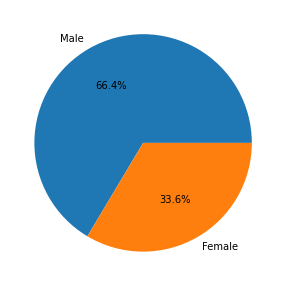

In [66]:
x = [669/1007*100, 338/1007*100]
y = ['Male','Female']

plt.figure(figsize=(5,5))
plt.pie(x, labels= y, autopct='%.1f%%')  #autopct: format for values
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47161 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_

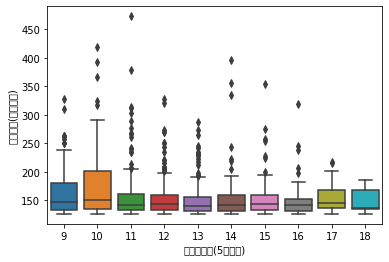

In [68]:
sns.boxplot(data = health_2bs, x = '연령대코드(5세단위)', y = '식전혈당(공복혈당)')

### 인사이트_2: 젊은 연령의 당뇨병 환자들 관련 이슈
처음 health_2 data를 살펴봤을 때는 행의 개수가 9,912개였다.
공복혈당장애에서 저혈당을 제외 당뇨병 위험 수치인 126을 기준으로 데이터를 추출 health_2bs를 다시 살펴봤을 때 행의 개수는 1007개였다 

약 10.1퍼센트의 사람들이 당뇨병으로 의심해 볼 수 있는 공복혈당 수치를 가지고 있는 것이다. 

성별을 기준으로 보면 남성이 66.4% 여성이 33.6%로 남성의 비율이 좀 더 높았으며

상자그림 그래프를 통해 봤을 때 정상수치를 훨씬 웃도는 이상치들이 11-13세에서 특히 많이 관찰되었다.

하지만 공복혈당이 한 번 126이 나왔다고 바로 당뇨로 진단하는 것은 아니다.
공복혈당이 126 이상으로 2회 이상 측정 되거나 공복혈당이 126이상이면서 
동시에 당화혈색소가 6.5 이상인 경우 당뇨로 진단할 수 있다. 

어린 나이고 한번의 측정으로 당뇨병이라 진단하기 어려운 부분이 있지만
정상수치를 훨씬 웃도는 수치를 기록한 사람들은 주기적으로 관찰할 필요가 있을 것이다.


### 인사이트_2-1: 그렇다면 정상수치로 기록된 사람들들, 공복혈당수치 100-125에 해당하는 공복혈당장애를 의심해 볼 수 있는 사람의 비율은 어떻게 될 것인가



In [69]:
health_2[health_2['식전혈당(공복혈당)']<=99]

,성별코드,연령대코드(5세단위),식전혈당(공복혈당)
0,M,9,90
1,F,13,87
5,M,9,86
7,M,13,93
9,F,14,85
...,...,...,...
9987,F,15,92
9988,M,14,80
9989,F,16,93
9992,M,15,89


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_

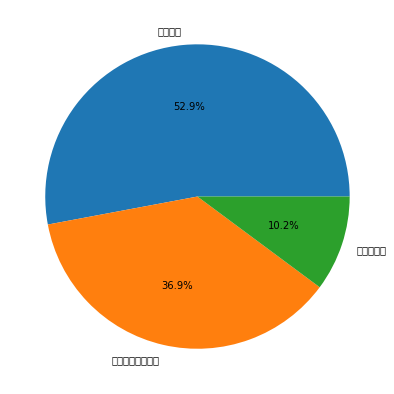

In [72]:
# 정상수치:5248명/공복혈당장애의심:3657명/당뇨병의심:1007명

x = [5248/9912*100, 3657/9912*100, 1007/9912*100]
y = ['정상수치', '공복혈당장애의심', '당뇨병의심']

plt.figure(figsize=(7,7))
plt.pie(x, labels= y, autopct='%.1f%%')  #autopct: format for values
plt.show()


# 인사이트 3을 위한 데이터 전처리

In [73]:
health_3 = health[['수축기혈압','이완기혈압','LDL콜레스테롤']]
health_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   수축기혈압     9912 non-null   float64
 1   이완기혈압     9912 non-null   float64
 2   LDL콜레스테롤  3977 non-null   float64
dtypes: float64(3)
memory usage: 234.5 KB


In [77]:
health_3['고혈압'] = health_3['수축기혈압']>=140

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [75]:
health_3.head()

,수축기혈압,이완기혈압,LDL콜레스테롤,고혈압
0,127.0,79.0,118.0,False
1,110.0,73.0,NaN,False
2,123.0,80.0,NaN,False
3,134.0,84.0,NaN,False
4,144.0,89.0,133.0,True


In [80]:
health_3hg = health_3[['고혈압','LDL콜레스테롤']]
health_3hg.dropna(axis = 0)

,고혈압,LDL콜레스테롤
0,False,118.0
4,True,133.0
5,False,147.0
6,False,40.0
8,False,101.0
...,...,...
9985,False,49.0
9989,False,86.0
9991,False,82.0
9994,False,110.0


In [83]:
health_3hg.groupby('고혈압').max()

,LDL콜레스테롤
고혈압,
False,297.0
True,256.0


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54792 missing from current font.
  font.set_

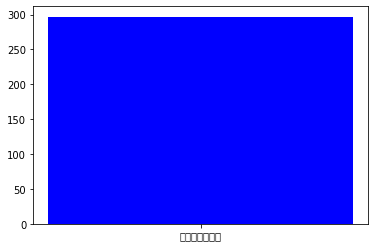

In [89]:
x= ['정상수치''고혈압']
y = [297,256]
plt.bar(x, y, width=0.1, color="blue")
plt.show()

In [84]:
health_3hg.groupby('고혈압').min()

,LDL콜레스테롤
고혈압,
False,13.0
True,18.0


In [85]:
health_3hg.groupby('고혈압').mean()

,LDL콜레스테롤
고혈압,
False,116.752779
True,113.270125


### 인사이트_3
 LDL은 입자가 매우 큰 콜레스테롤로 양이 과도하게 증가할 경우,혈관벽에 쌓여서 동맥경화나 각종 질병을 야기 하는 성분이다. 
따라서 고혈압 위험 수치를 가진 사람은 LDL의 수치 또한 높을 것으로 생각.
그러나 고혈압으로 판정한 사람들과 아닌 사람들의 LDL수치는 크게 차이가 나지 않음.

LDL콜레스테로 수치는 혈관 벽에 영향을 끼치므로 고혈압에 영향을 끼칠 수는 있지만 직접적인 인과관계는 없는 것으로 보인다 